<a href="https://colab.research.google.com/github/MainN/diploma/blob/master/pyro/PyroWorking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl
!pip3 install torchvision
!pip3 install pyro-ppl


ERROR: torch-0.4.0-{platform}-linux_x86_64.whl is not a valid wheel filename.
     |████████████████████████████████| 573kB 2.6MB/s 


In [2]:
from __future__ import print_function
import math
import os
import torch
import torch.distributions.constraints as constraints
import pyro
from pyro.optim import Adam
from pyro.infer import SVI, Trace_ELBO
import pyro.distributions as dist

Sample: 100%|██████████| 1500/1500 [00:02, 546.41it/s, step size=1.28e+00, acc. prob=0.877]


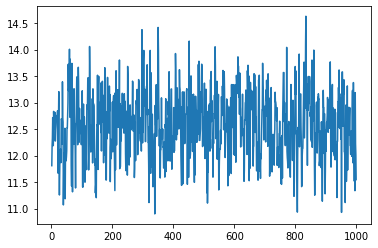

In [19]:
import pyro
import os
from functools import partial
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pyro.poutine as poutine
import pyro.distributions as dist
from pyro.infer.mcmc.api import MCMC
from pyro.infer.mcmc.hmc import HMC

def scale(guess):
    weight = pyro.sample("weight", dist.Normal(guess, 1.0))
    measurement = pyro.sample("measurement", dist.Normal(weight, 0.75))
    return measurement
conditioned_scale = pyro.condition(scale, data={"measurement": torch.tensor(14.)})
guess_prior = 10.
hmc_kernel = HMC(conditioned_scale, step_size=0.00000009, num_steps=1)
posterior = MCMC(hmc_kernel,
                 num_samples=1000,
                 warmup_steps=500)
posterior.run(guess_prior)
samples = posterior.get_samples()
colors = ['b', 'g', 'r']

#sns.distplot(samples['weight'],color=colors[0])

sns.lineplot(x=range(1,1001),y=samples['weight'])